Total Vehicle Crashes in New York (2012-2023)
A quick view in New York vehicle crashes

About Dataset
The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
%matplotlib inline

<Figure size 900x600 with 0 Axes>

In [3]:
#Загружаем датасет
df = pd.read_csv("~/desktop/pandas_pr/VehicleCrashesNY/NYC.csv")

C:\Users\jss12\AppData\Local\Temp\ipykernel_11148\2623182133.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("~/desktop/pandas_pr/VehicleCrashesNY/NYC.csv")


In [4]:
#Просмотр типов данных всех столбцов с данными
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014209 entries, 0 to 2014208
Data columns (total 22 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   NUMBER OF PERSONS INJURED      float64
 10  NUMBER OF PERSONS KILLED       float64
 11  NUMBER OF PEDESTRIANS INJURED  int64  
 12  NUMBER OF PEDESTRIANS KILLED   int64  
 13  NUMBER OF CYCLIST INJURED      int64  
 14  NUMBER OF CYCLIST KILLED       int64  
 15  NUMBER OF MOTORIST INJURED     int64  
 16  NUMBER OF MOTORIST KILLED      int64  
 17  CONTRIBUTING FACTOR VEHICLE 1  object 
 18  CO

In [5]:
#Размер датафрейма
df.shape

(2014209, 22)

In [6]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN


In [7]:
#Переименование названий столбцов датафрейма
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2'],
      dtype='object')

In [8]:
df.crash_date = pd.to_datetime(df.crash_date).dt.year

<Axes: xlabel='crash_date', ylabel='cnt_crushes'>

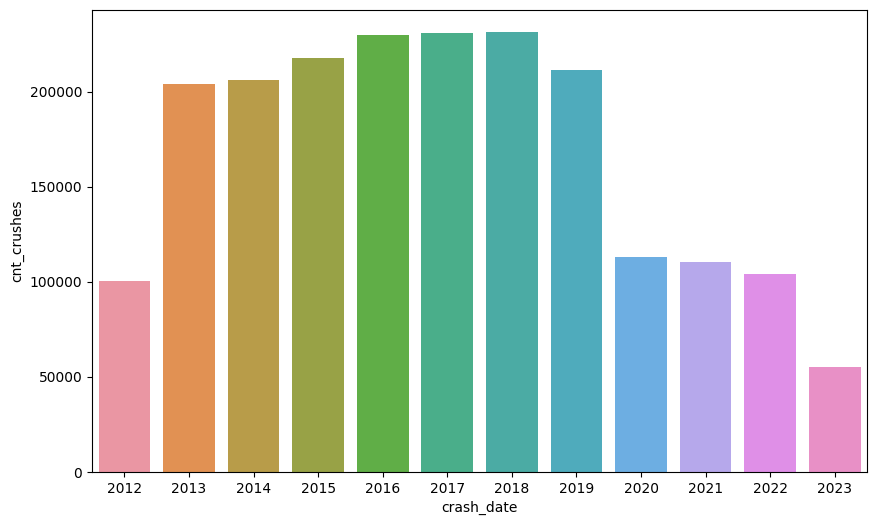

In [9]:
#Число аварий зафиксированных через протокол полици за каждый год  
plt.figure(figsize=(10,6))
sns.barplot(data = df.groupby('crash_date').agg({'crash_time':'count'}).rename(columns={'crash_time':'cnt_crushes'}).reset_index(), x = 'crash_date', y = 'cnt_crushes')

Из графика видно, что количество аварий в 2020 году сократилось почти в два раз, а в 2013 количество аварий увеличилось в 2 раза, по сравнению с 2012. Такое падение в 2020 можно объяснить введением ограничений и локдауна в Нью-Йорке из за вируса COVID-19.

In [10]:
# Самая распространенная причина аварий в городе, котороые вносятися в протокол MV-104AN за каждый год
dff = df.groupby(['crash_date', 'contributing_factor_vehicle_1']).agg({'collision_id':'count'}).reset_index().query('contributing_factor_vehicle_1 != "Unspecified" and contributing_factor_vehicle_1 != "Other Vehicular"').rename(columns={'collision_id':'vh_cnt'})
dff.groupby('crash_date')[['vh_cnt']].max().reset_index().merge(dff)

,crash_date,vh_cnt,contributing_factor_vehicle_1
0,2012,10408,Driver Inattention/Distraction
1,2013,22321,Driver Inattention/Distraction
2,2014,24792,Driver Inattention/Distraction
3,2015,32028,Driver Inattention/Distraction
4,2016,49283,Driver Inattention/Distraction
5,2017,54392,Driver Inattention/Distraction
6,2018,57069,Driver Inattention/Distraction
7,2019,55186,Driver Inattention/Distraction
8,2020,28627,Driver Inattention/Distraction
9,2021,26508,Driver Inattention/Distraction


Чаще всего аварии случаются из-за невнимательности водителей

<Axes: xlabel='crash_date', ylabel='vh_cnt'>

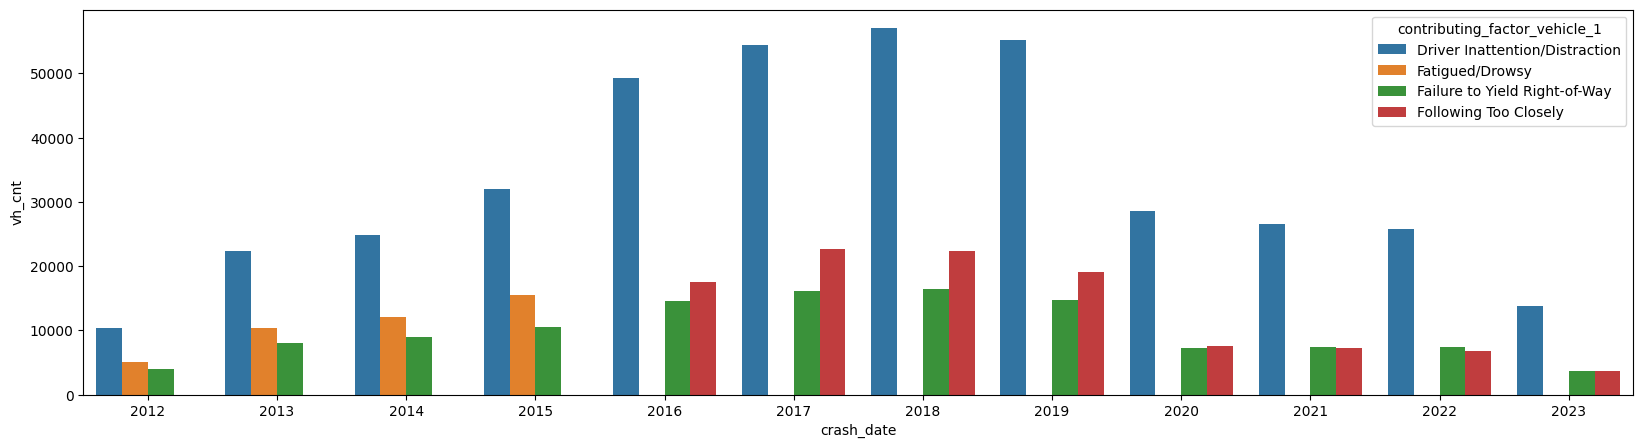

In [11]:
# Топ-3 самых распространенных причины аварий за каждый год, включая невнимательность водителей
plt.figure(figsize=(20,5))
plot = dff.merge(dff.groupby('crash_date').vh_cnt.sum().reset_index().rename(columns = {'vh_cnt':'cnt_crashes_by_year'})).groupby('crash_date').apply(lambda x: x.sort_values(by = 'vh_cnt', ascending=False).head(3).reset_index(drop=True)).reset_index(drop=True)
sns.barplot(data = plot, x = 'crash_date', y = 'vh_cnt', hue = 'contributing_factor_vehicle_1')

<Axes: xlabel='vehicle_type_code', ylabel='count_of_crashes'>

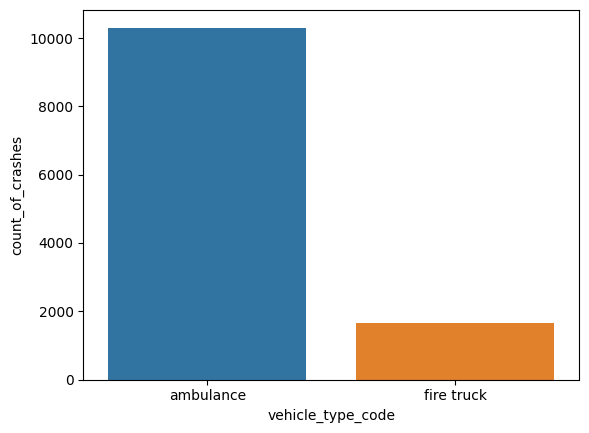

In [12]:
# Число аварий, в которые попадали машины скорой помощи и пожарные машины с 2012 по 2023
df.loc[:, 'vehicle_type_code_1'] = df.vehicle_type_code_1.str.lower() 
df.loc[:, 'vehicle_type_code_2'] = df.vehicle_type_code_2.str.lower()
amb_fire_df = pd.concat([df.query('vehicle_type_code_1 == "ambulance" or vehicle_type_code_1 == "fire truck"')[['vehicle_type_code_1','crash_date', 'collision_id']].rename(columns={'vehicle_type_code_1':'vehicle_type_code'}), df.query('(vehicle_type_code_2 == "ambulance" or vehicle_type_code_2 == "fire truck") and (vehicle_type_code_1 != "ambulance" or vehicle_type_code_1 != "fire truck")')[['vehicle_type_code_2','crash_date', 'collision_id']].rename(columns={'vehicle_type_code_2':'vehicle_type_code'})])
sns.barplot(data = amb_fire_df.groupby('vehicle_type_code').agg({'crash_date':'count'}).reset_index().rename(columns={'crash_date':'count_of_crashes'}), x='vehicle_type_code', y='count_of_crashes')


Из графика видно, что машины скорой помощи попадают в аварии примерно в 5 раз чаще, чем пожарные машины. Посмотрим число аварий у служб спасения по годам

<Axes: xlabel='crash_date', ylabel='count_of_crashes'>

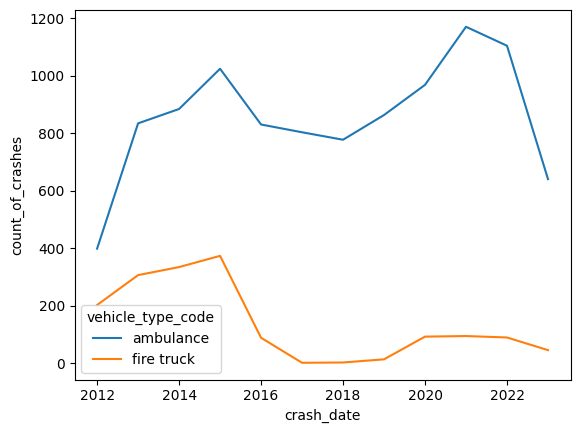

In [13]:
sns.lineplot(data = amb_fire_df.rename(columns={'collision_id':'count_of_crashes'}).groupby(['vehicle_type_code', 'crash_date']).agg({'count_of_crashes':'count'}), x = 'crash_date', hue = 'vehicle_type_code', y='count_of_crashes')

In [14]:
df_ambulance = df.query('vehicle_type_code_1=="ambulance" or vehicle_type_code_2=="ambulance"')
df_ambulance

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,number_of_persons_injured,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2
63,2022,21:40,QUEENS,11418.0,40.695156,-73.845406,"(40.695156, -73.845406)",JAMAICA AVENUE,102 STREET,0.0,...,0,0,0,0,0,Reaction to Uninvolved Vehicle,Unspecified,4521858,ambulance,station wagon/sport utility vehicle
70,2021,12:00,BROOKLYN,11213.0,40.665375,-73.934235,"(40.665375, -73.934235)",CROWN STREET,SCHENECTADY AVENUE,0.0,...,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4485333,sedan,ambulance
217,2021,8:30,BRONX,10457.0,40.839443,-73.904360,"(40.839443, -73.90436)",NaN,NaN,0.0,...,0,0,0,0,0,Unsafe Lane Changing,Unspecified,4485668,ambulance,sedan
223,2021,16:07,MANHATTAN,10027.0,40.813885,-73.952110,"(40.813885, -73.95211)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,Unspecified,4485696,sedan,ambulance
352,2021,8:00,BROOKLYN,11204.0,40.615780,-73.999950,"(40.61578, -73.99995)",BAY RIDGE PARKWAY,NEW UTRECHT AVENUE,0.0,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4455993,ambulance,bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013502,2023,13:40,BROOKLYN,11201.0,40.691120,-73.997550,"(40.69112, -73.99755)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,Unspecified,4647407,ambulance,ambulance
2013605,2023,12:30,NaN,NaN,NaN,NaN,NaN,WEST 183 STREET,LORING PLACE NORTH,0.0,...,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4647931,ambulance,sedan
2013637,2023,14:05,QUEENS,11377.0,40.735485,-73.917470,"(40.735485, -73.91747)",LAUREL HILL BOULEVARD,49 STREET,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4647529,station wagon/sport utility vehicle,ambulance
2014115,2023,3:30,MANHATTAN,10035.0,40.806408,-73.940160,"(40.806408, -73.94016)",MADISON AVENUE,EAST 126 STREET,0.0,...,0,0,0,0,0,View Obstructed/Limited,Driver Inattention/Distraction,4648062,ambulance,station wagon/sport utility vehicle


In [15]:
df_ambulance.borough.value_counts()

borough
BROOKLYN         2308
BRONX            2114
MANHATTAN        1962
QUEENS           1170
STATEN ISLAND     122
Name: count, dtype: int64

In [18]:
# Выделение из времени аварии целого часа
df_ambulance.crash_time = pd.to_datetime(df_ambulance.crash_time).dt.hour
#df_ambulance.loc[:, 'crash_time'] = df_ambulance.crash_time.str.split(':').str[0]
#df_ambulance.crash_time = df_ambulance.crash_time.astype('int')

C:\Users\jss12\AppData\Local\Temp\ipykernel_11148\2656597184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ambulance.crash_time = pd.to_datetime(df_ambulance.crash_time).dt.hour


<Axes: xlabel='crash_time'>

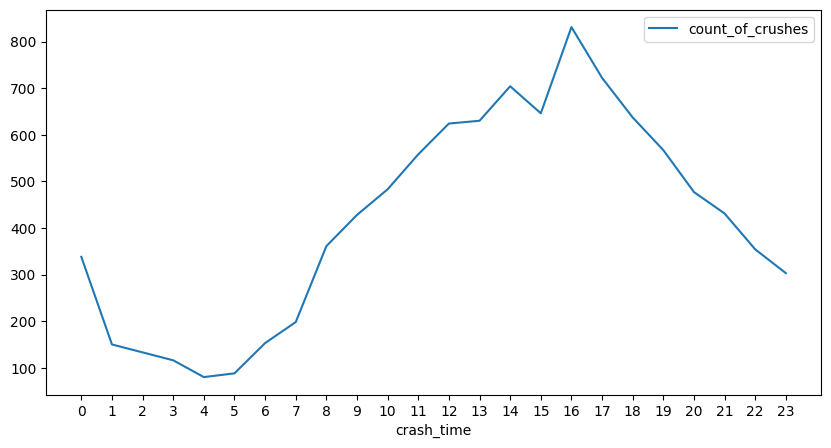

In [22]:
plt.figure(figsize=(10,5))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
sns.lineplot(data = df_ambulance[['crash_time','crash_date']].groupby('crash_time').agg({'crash_date':'count'}).rename(columns={'crash_date':'count_of_crushes', 'crash_time':'crash_hour'}))

Чаще всего аварии у скорых случаются в 16 часов, скорее всего это связано с увеличением числа машин в это время.